# Chapter 15

## Exercise 15.1

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import sklearn
from sklearn.decomposition import PCA
import math
import scipy

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
plt.rcParams["figure.figsize"] = (12,10)

In [2]:
istanbul_stock_exchange = fetch_ucirepo(id=247) 

In [3]:
data = istanbul_stock_exchange.data.features 

In [4]:
data['date'] = pd.to_datetime(data.date, format='%d-%b-%y')

In [5]:
data.columns = ['date', 'ISE', '_', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU',
       'EM']

In [6]:
data.head()

,date,ISE,_,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


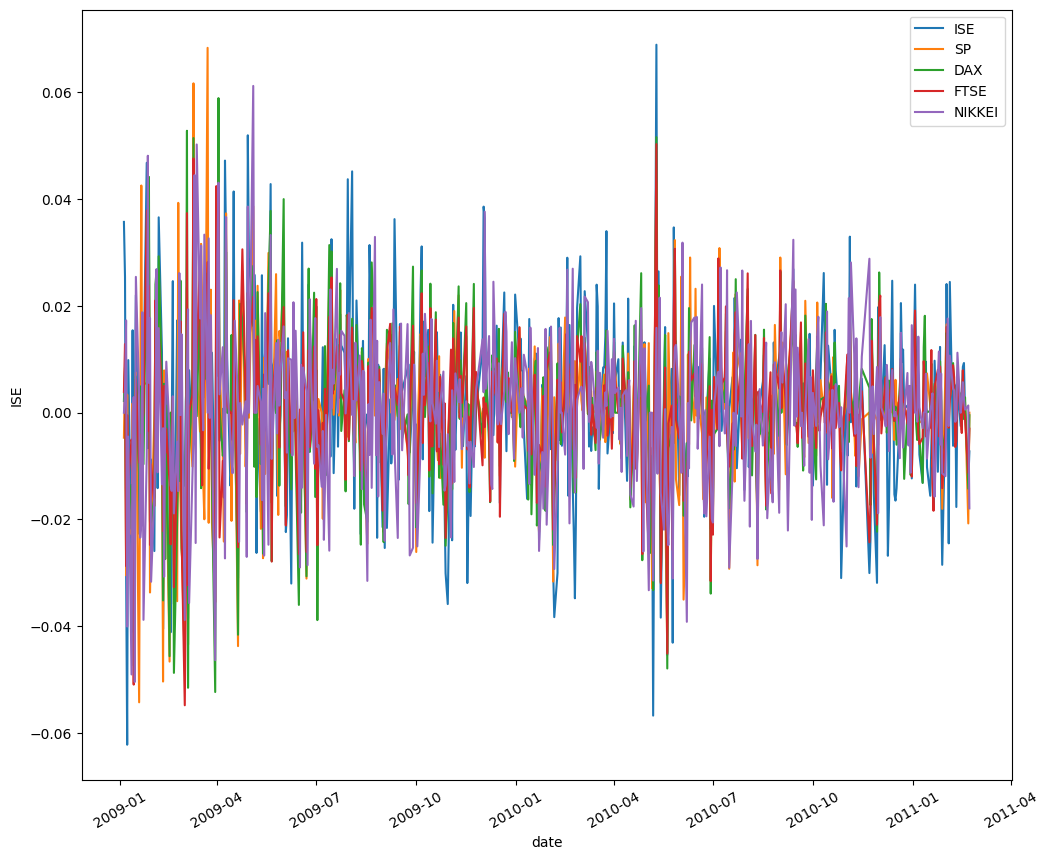

In [7]:
sns.lineplot(data=data, x='date', y='ISE', label='ISE')
sns.lineplot(data=data, x='date', y='SP', label='SP')
sns.lineplot(data=data, x='date', y='DAX', label='DAX')
sns.lineplot(data=data, x='date', y='FTSE', label='FTSE')
sns.lineplot(data=data, x='date', y='NIKKEI', label='NIKKEI')

plt.xticks(rotation=30)
plt.legend()

<AxesSubplot:>

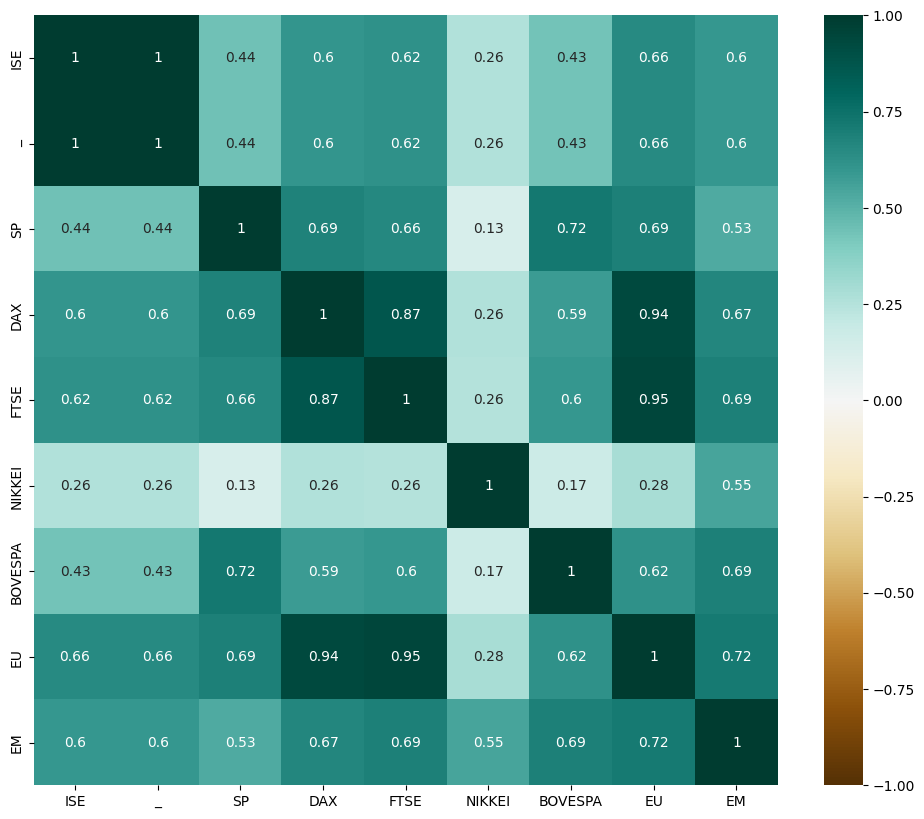

In [8]:
sns.heatmap(data.corr(), cmap='BrBG', annot=True, vmin=-1, vmax=1)

In [9]:
data.head()

,date,ISE,_,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [10]:
data.mean(axis=0)

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_4328\2773904261.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean(axis=0)


ISE        0.001629
_          0.001629
SP         0.000643
DAX        0.000721
FTSE       0.000510
NIKKEI     0.000308
BOVESPA    0.000935
EU         0.000471
EM         0.000936
dtype: float64

In [11]:
data[data.columns[1]]

0      0.035754
1      0.025426
2     -0.028862
3     -0.062208
4      0.009860
         ...   
531    0.008599
532    0.009310
533    0.000191
534   -0.013069
535   -0.007246
Name: ISE, Length: 536, dtype: float64

In [12]:
#normalization

data_processed = data.copy().drop('date', axis=1)


for i in data_processed.columns[1:]:
    data_processed[i] = data_processed[i] - data_processed.mean(axis=0)[i] 

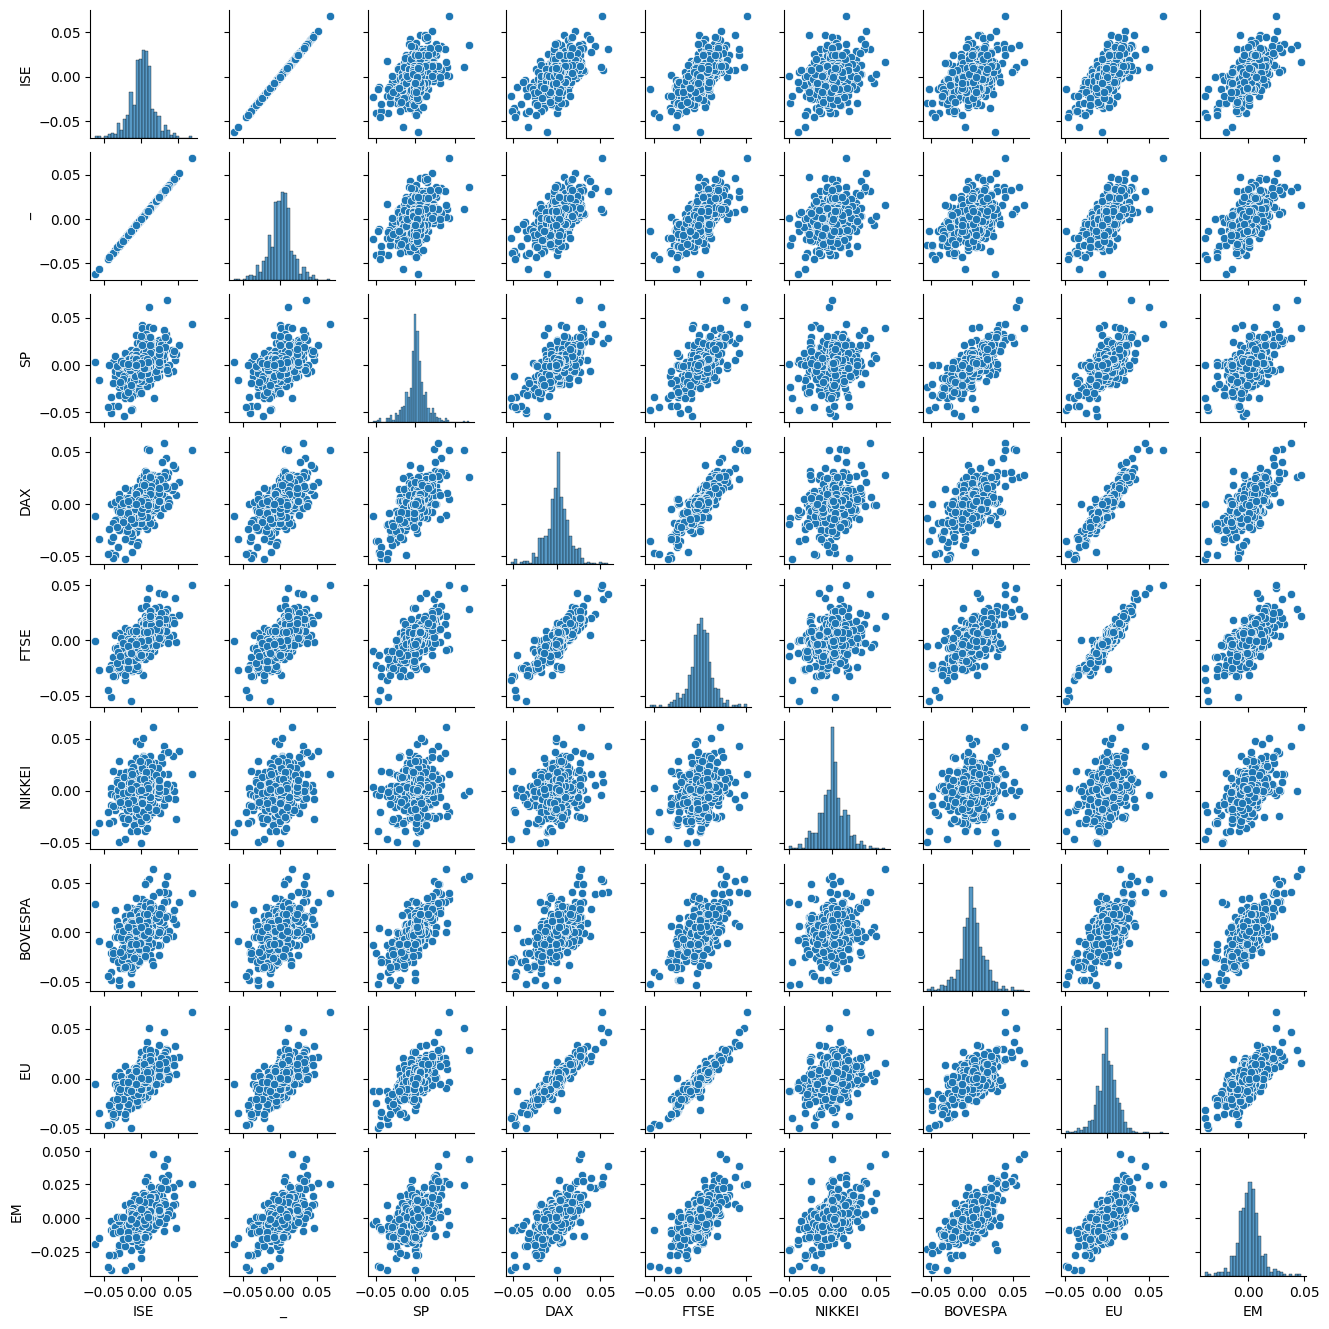

In [13]:
sns.pairplot(data,height=1.5)

In [14]:
data_processed

,ISE,_,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.034125,-0.005323,0.001473,0.003384,-0.000308,0.030255,0.012227,0.027589
1,0.025426,0.023797,0.007143,0.007735,0.012355,0.003855,0.017984,0.010870,0.007837
2,-0.028862,-0.030491,-0.031112,-0.018554,-0.029245,0.016985,-0.036834,-0.017543,-0.020951
3,-0.062208,-0.063837,0.002748,-0.012447,-0.000976,-0.040369,0.027348,-0.006032,-0.020360
4,0.009860,0.008231,-0.022177,-0.020594,-0.013220,-0.004781,-0.010699,-0.011459,-0.008738
...,...,...,...,...,...,...,...,...,...
531,0.008599,0.006970,0.005595,0.001204,0.007442,0.005410,0.017435,0.006504,0.002103
532,0.009310,0.007681,0.002428,-0.001907,-0.000165,0.002312,0.000750,-0.001051,0.000103
533,0.000191,-0.001438,0.001280,0.002151,-0.001233,0.000261,0.004693,0.000101,0.006002
534,-0.013069,-0.014698,-0.021385,-0.014960,-0.011785,0.001050,-0.012877,-0.013086,-0.001894


In [15]:
cm = data_processed.cov()

<AxesSubplot:>

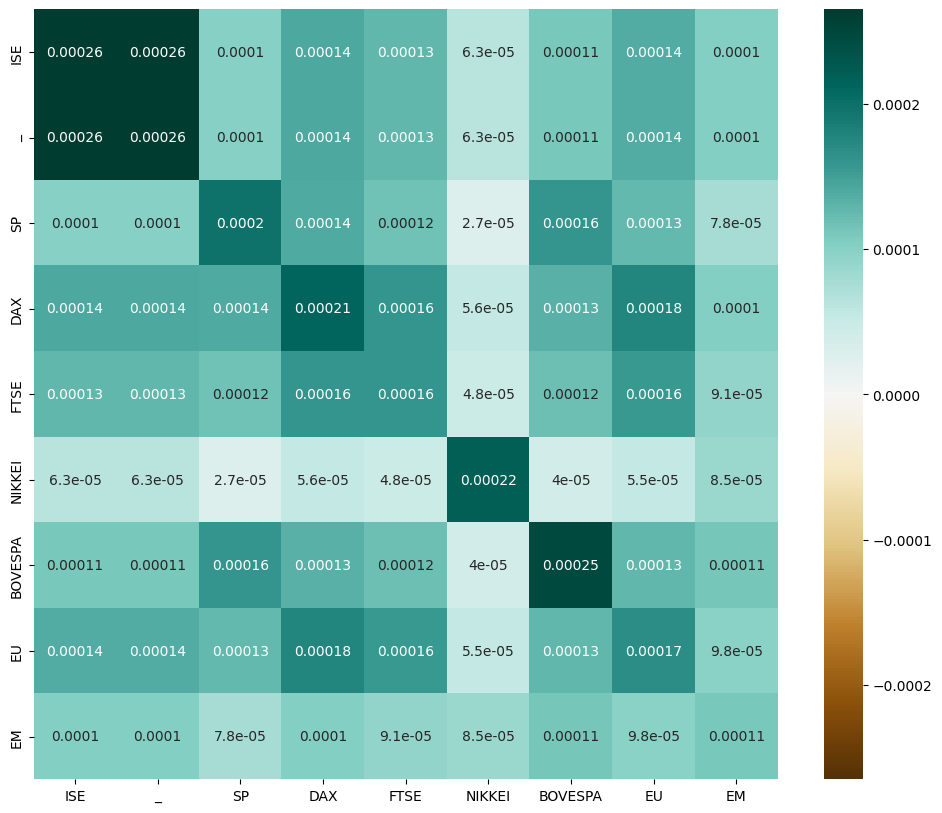

In [16]:
sns.heatmap(cm, cmap='BrBG', vmax=0.000265, vmin=-0.000265, annot=True)

<AxesSubplot:>

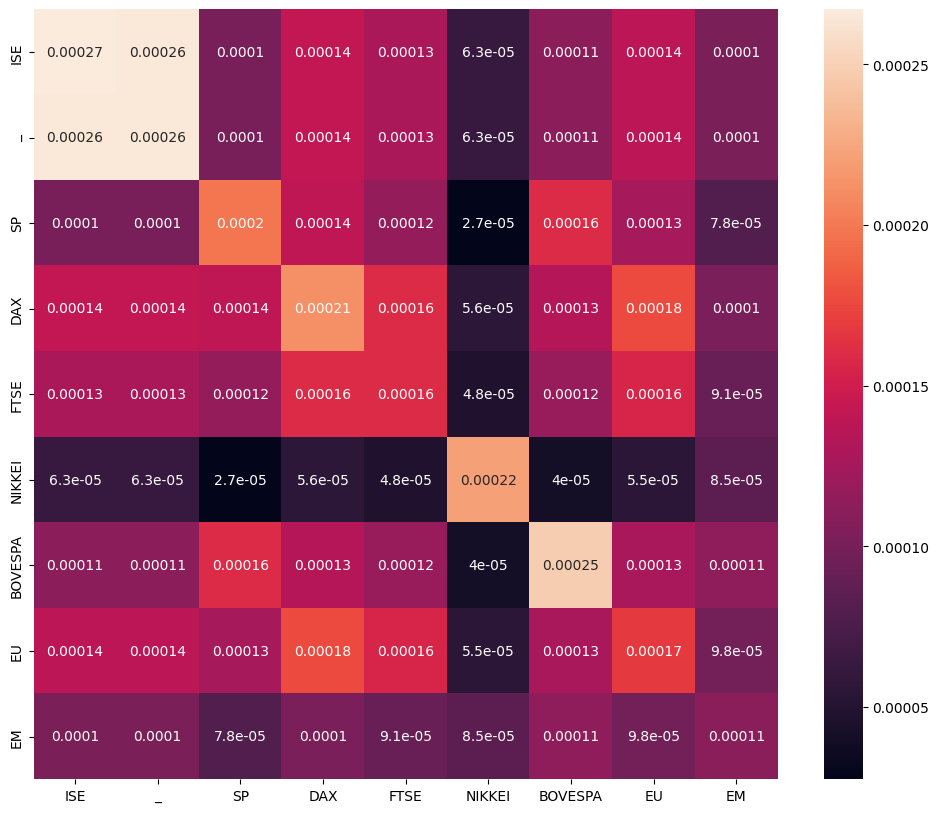

In [17]:
sns.heatmap(data_processed.T@data_processed / (data_processed.shape[0]-1), annot=True)

In [18]:
l, V = np.linalg.eig(cm)

In [19]:
l

array([ 1.15073812e-03,  2.53894648e-04,  2.09147723e-04,  1.22823325e-04,
        6.06541241e-05, -1.34120315e-19,  5.14671984e-06,  2.07268270e-05,
        2.42312538e-05])

In [20]:
# This function gives us the correct order for eigen vectors(from the smallest to the largest)

def get_index_orders(arr):
    arr1 = arr.copy()
    arr1.sort()
    order=[]
    for i in range(len(arr1)):
        for j in range(len(arr)):
            if arr1[i] == arr[j]:
                order.append(j)
    return order

# UPD: actually, there is a np.argsort for that, but I didn't know that

In [21]:
V_ordered = V[:, get_index_orders(l)[::-1]].copy()

l_ordered = l.copy()
l_ordered.sort()
l_ordered = l_ordered[::-1]

In [22]:
components = data_processed  @ V_ordered[:,0:2]

In [23]:
print(components.shape)

(536, 2)


In [24]:
factorScores = 100*l_ordered/np.sum(l_ordered)

In [25]:
np.sum(l_ordered)

0.0018473627448934047

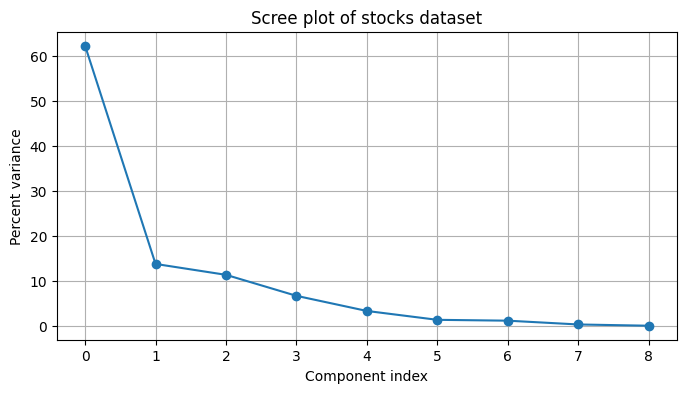

In [26]:
plt.figure(figsize=(8,4))
plt.plot(factorScores,'o-')
plt.xlabel('Component index')
plt.ylabel('Percent variance')
plt.title('Scree plot of stocks dataset')
plt.grid()
plt.show()

In [27]:
print('Variance of first two components:')
print(np.var(components,axis=0,ddof=1)) # note the ddof=1! The default produces the biased variance.

print(f'\nFirst two eigenvalues:')
print(l_ordered[:2])

Variance of first two components:
0    0.001151
1    0.000254
dtype: float64

First two eigenvalues:
[0.00115074 0.00025389]


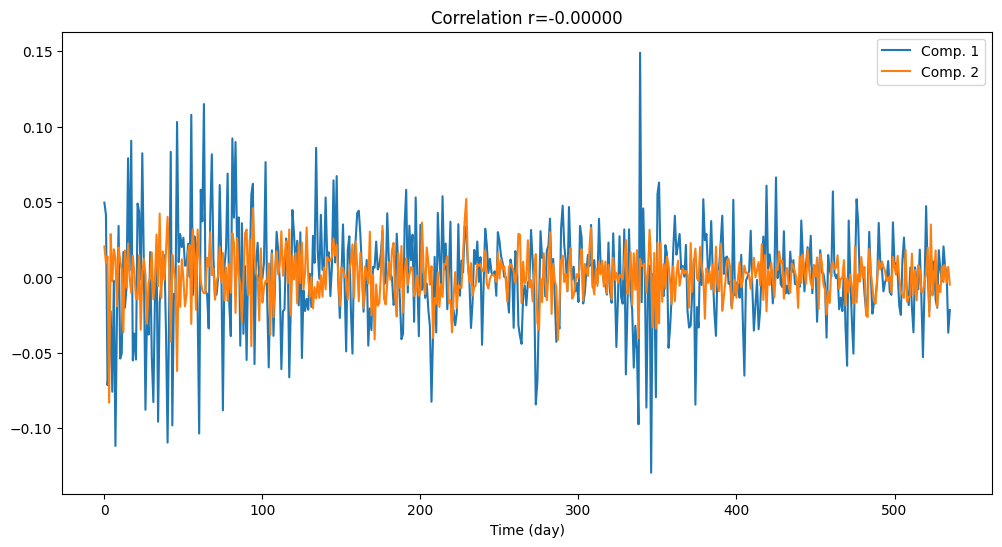

In [28]:

# correlate first two components

plt.figure(figsize=(12,6))
plt.plot(components)
plt.xlabel('Time (day)')
plt.legend(['Comp. 1','Comp. 2'])
plt.title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')
plt.show()

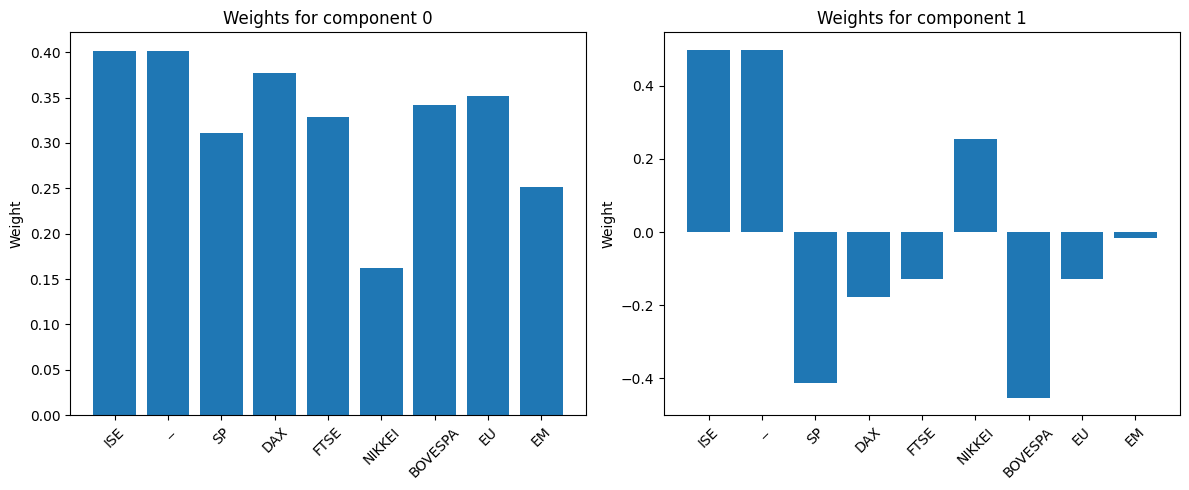

In [29]:

_,axs = plt.subplots(1,2,figsize=(12,5))

for i in range(2):
  axs[i].bar(range(data_processed.shape[1]),V_ordered[:,i])
  axs[i].set_xticks(range(data_processed.shape[1]))
  axs[i].set_xticklabels(data_processed.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')

plt.tight_layout()
plt.show()
     

## Exercise 15.2

In [30]:
U, s, V = np.linalg.svd(cm)

In [31]:
s, l_ordered

(array([1.15073812e-03, 2.53894648e-04, 2.09147723e-04, 1.22823325e-04,
        6.06541241e-05, 2.42312538e-05, 2.07268270e-05, 5.14671984e-06,
        1.83602540e-20]),
 array([ 1.15073812e-03,  2.53894648e-04,  2.09147723e-04,  1.22823325e-04,
         6.06541241e-05,  2.42312538e-05,  2.07268270e-05,  5.14671984e-06,
        -1.34120315e-19]))

In [32]:
U,s,V = np.linalg.svd(data_processed)

In [33]:
s**2/(data_processed.shape[0]-1)

array([1.15116830e-03, 2.54560010e-04, 2.09301635e-04, 1.22893509e-04,
       6.06644576e-05, 2.42325046e-05, 2.07305380e-05, 5.14726593e-06,
       1.32272937e-06])

## Exercise 15.3

In [34]:
p = PCA()

In [35]:
X = p.fit_transform(data_processed)

In [36]:
print(p.explained_variance_[:4])

[0.00115074 0.00025389 0.00020915 0.00012282]


In [37]:
print(p.components_[0,:])

[0.40184889 0.40184889 0.31066217 0.37677906 0.32909908 0.1617159
 0.34187516 0.35176523 0.25196404]


In [38]:
print(V_ordered[:, 0])

[0.40184889 0.40184889 0.31066217 0.37677906 0.32909908 0.1617159
 0.34187516 0.35176523 0.25196404]


## Exercise 15.4

In [39]:
DOTS = np.random.randn(2, 1000)

In [40]:
DOTS

array([[-0.39925591, -1.47305812, -2.20115344, ..., -0.01258187,
        -2.09866293,  0.34291994],
       [ 0.90458313, -0.06779001,  0.60872197, ..., -0.56558492,
        -1.85295013, -0.16948559]])

In [41]:
DOTS[1,:] = DOTS[1,:] * 0.05

In [42]:
alpha = math.pi/6
beta = math.pi/3

In [43]:
A = np.array([[math.cos(alpha), -math.sin(alpha)],
              [math.sin(alpha), math.cos(alpha)]])

B = np.array([[math.cos(beta), -math.sin(beta)],
              [math.sin(beta), math.cos(beta)]])

In [44]:
X = A @ DOTS
Y = B @ DOTS

In [45]:
X = np.hstack([X,Y])

In [46]:
X

array([[-0.36838034, -1.274011  , -1.92147285, ...,  0.01819961,
        -0.96909637,  0.17879891],
       [-0.16045836, -0.73946445, -1.07421829, ..., -0.02503584,
        -1.86381916,  0.29274024]])

(-3.0, 3.0, -3.0, 3.0)

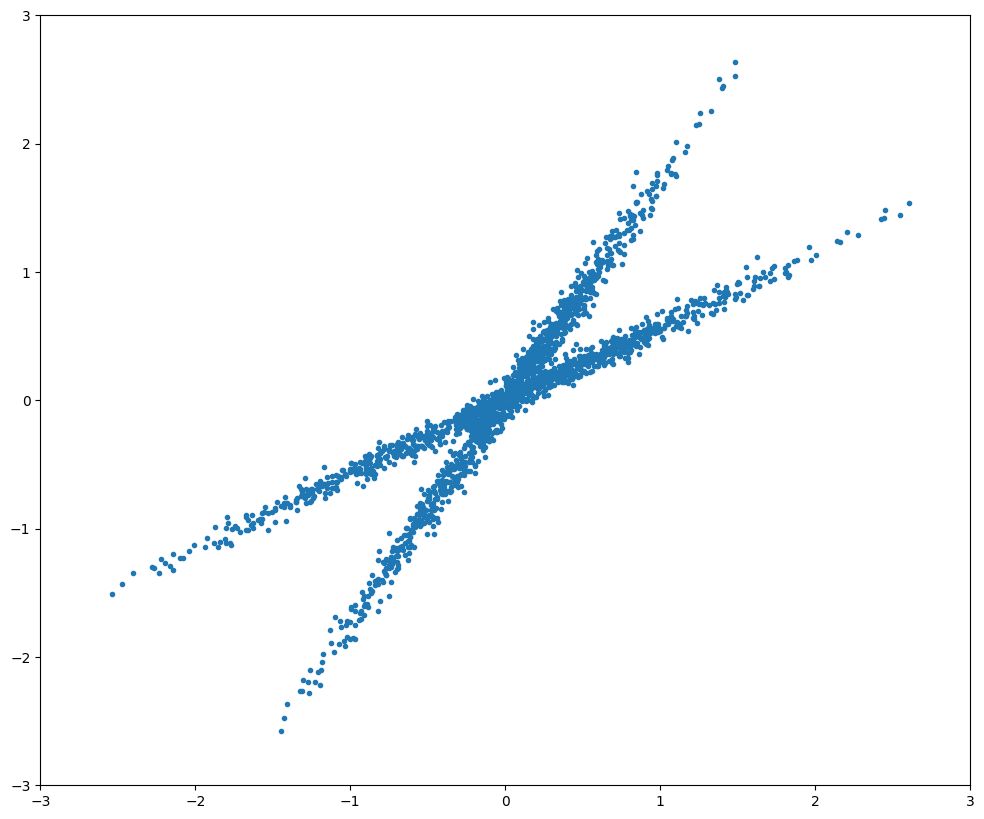

In [47]:
plt.plot(X[0,:], X[1,:], '.')
plt.axis([-3, 3, -3,3])

In [48]:
p = PCA()

In [49]:
means = np.mean(X.T, axis=0)

In [50]:
r = p.fit_transform(X.T - means)

In [51]:
np.mean(X.T - means, axis=0)

array([-5.77315973e-18, -2.66453526e-18])

In [52]:
p.components_

array([[-0.70779019, -0.70642271],
       [-0.70642271,  0.70779019]])

In [53]:
l = p.components_[:,0]
m = p.components_[:,1]

In [54]:
l @ m.T

-2.1642264091082653e-17

In [55]:
l

array([-0.70779019, -0.70642271])

(-2.7965212846643914,
 2.9364852864796354,
 -2.83607779690796,
 2.8969287742360668)

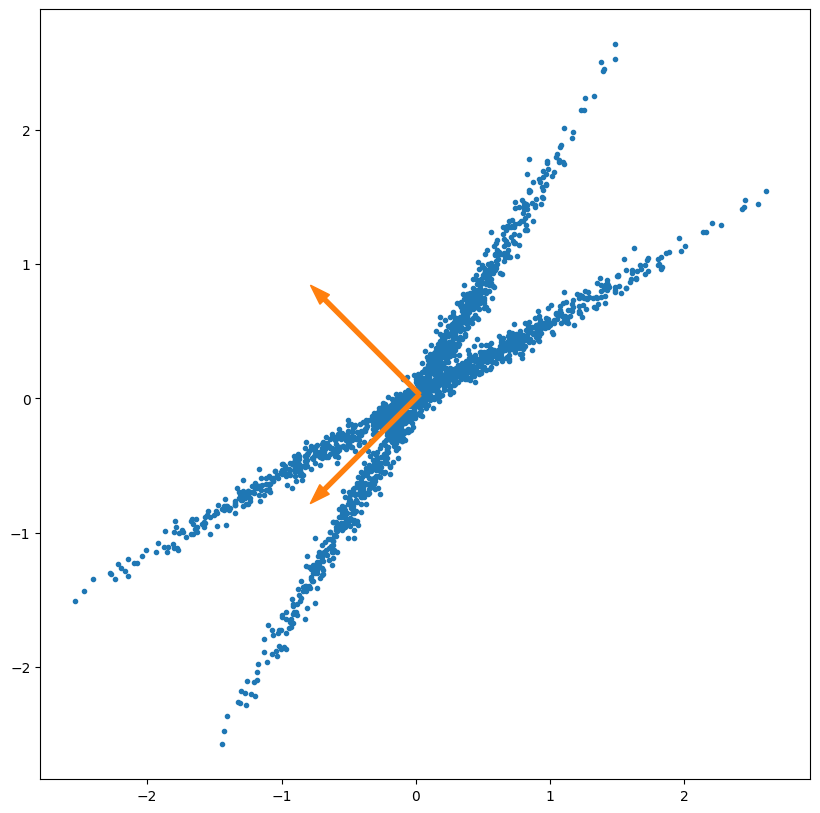

In [57]:
plt.arrow(*means, *l, zorder=2, color='C1', head_width=0.1, width=0.03)
plt.plot(X[0,:], X[1,:], '.', zorder=1)
plt.arrow(*means, *m, zorder=2, color='C1', head_width=0.1, width=0.03)
plt.axis('square')

## Exercise 15.5

In [61]:
X = np.random.randn(2, 200)
Y = np.random.randn(2, 200)

In [62]:
X[1,:] = X[1,:] + X[0,:]
Y[1,:] = Y[1,:] + Y[0,:]

In [68]:
plt.rcParams["figure.figsize"] = (8,6)

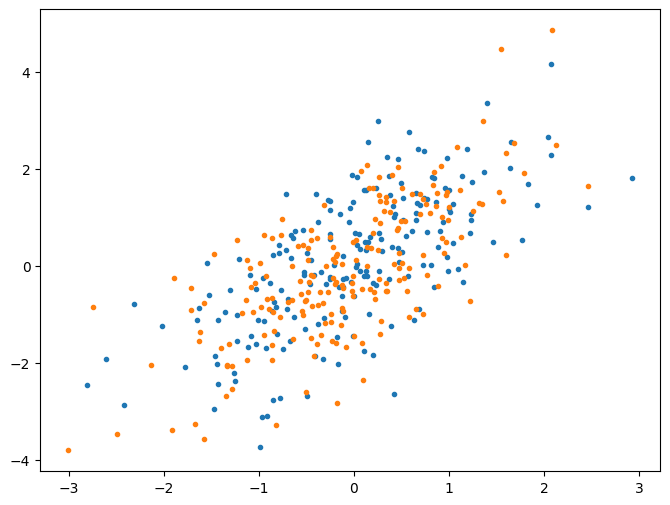

In [69]:
plt.plot(X[0,:], X[1,:], '.')
plt.plot(Y[0,:], Y[1,:], '.')

In [70]:
X[0,:] = X[0,:] + 2
X[1,:] = X[1,:] - 1

(-3.4020511819153776, 7.148885625183185, -5.215276991335969, 5.335659815762593)

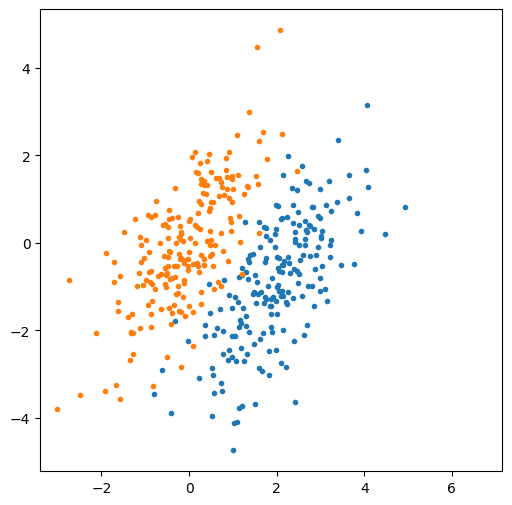

In [72]:
plt.plot(X[0,:], X[1,:], '.')
plt.plot(Y[0,:], Y[1,:], '.')
plt.axis('square')

In [76]:
Z = np.hstack([X, Y])

In [80]:
labels  = np.append(np.zeros(200),np.ones(200))

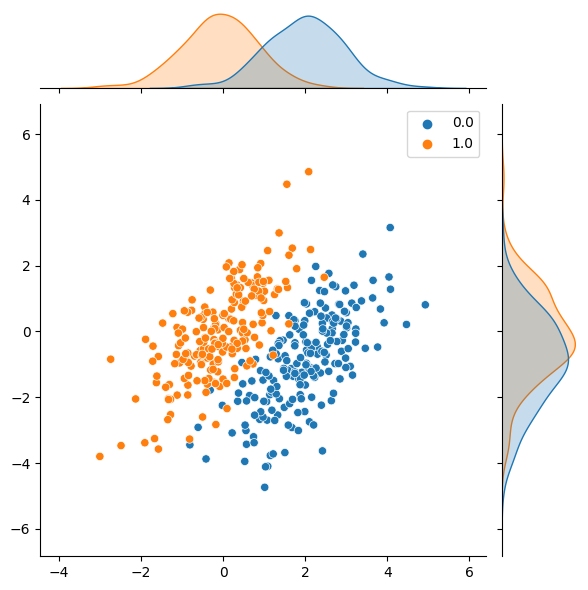

In [82]:
sns.jointplot(x=Z[0, :], y=Z[1,:], hue=labels)

## Exercise 15.6

In [118]:
# SKIPPEd

## Exercise 15.7

In [119]:
#Skipped

## Exercise 15.8

In [122]:
ldamodel = LDA(solver='eigen')
ldamodel.fit(Z.T,labels)

LinearDiscriminantAnalysis(solver='eigen')

In [124]:
predictedLabel = ( projA[:,0] > 0 )+0

Text(0.5, 1.0, 'Accuracy = 96.75%')

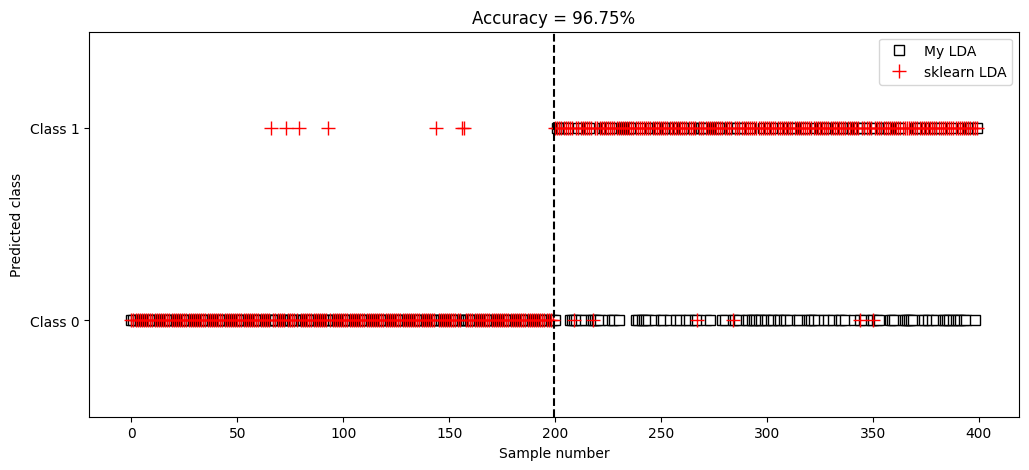

In [128]:
plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2,label='My LDA')
plt.plot(ldamodel.predict(Z.T),'r+',markersize=10,markerfacecolor='w',linewidth=2,label='sklearn LDA')
plt.plot([200-.5,200-.5],[-.5,1.5],'k--')
plt.xlabel('Sample number')
plt.ylabel('Predicted class')
plt.yticks([0,1],labels=['Class 0','Class 1'])
plt.ylim([-.5,1.5])
plt.legend()
plt.title(f'Accuracy = {100*np.mean(ldamodel.predict(Z.T)==labels):.2f}%')